# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test=pd.read_csv('/content/drive/MyDrive/INternship/grad.project/test.csv')
train=pd.read_csv('/content/drive/MyDrive/INternship/grad.project/train.csv')

In [ ]:
print('train data shape:{}\ntest data shape:{}'.format(train.shape,test.shape))

train data shape:(43152, 11)
test data shape:(10788, 10)


#Data Analysis

**Factors that affect a dimond price are:**

> "Colour, Clarity, Carat and Cut"



**Factors explained:**

Cut - An Excellent cut boasts the most sparkle and value. Only round diamonds receive a cut grade, but Excellent symmetry and polish grades have similar impact on other diamond shapes. Choose Excellent, or Very Good at the lowest. Lower grades will cost less, but will lack intense sparkle.

Colour - Diamonds are graded from D (colourless) to Z (light yellow-brownish). **Ideally choose between D to F** which appear bright and colourless, or G to H for a tighter budget. Anything lower will cost less, but will be visibly less bright and icy white.

Clarity - Diamonds contain small imperfections called inclusions. The more inclusions, the lower the price; but many inclusions are so small they aren't visible to the naked eye. So this is a great place to compromise and save budget - **choose between VS2 to SI1 which is a midway point between F (Flawless) and I (Included).**

Carat - The biggest driver of a diamond's price is its carat weight. -**Price increases exponentially with carat**,


**Shape is an important consideration when buying a diamond as it directly influences price.**

Round diamonds tend to be priced higher than other shapes because of their incredible brilliance, market demand, and increased manufacturing costs.

Non-round diamonds are referred to as fancy shapes.

Blue Nile offers nine fancy options, including princess, emerald, Asscher, cushion, marquise, radiant, oval, pear and heart.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
train['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [ ]:
train['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [ ]:
train['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [ ]:
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#No null values

In [ ]:
train.drop_duplicates(inplace=True)


In [ ]:
train.drop('Id',axis=1).corr()

<ipython-input-43-f0a6cbf3cccd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.drop('Id',axis=1).corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


In [ ]:
#there is a strong positive relation between carat, x(length), y(width) and z(height) of the dimond and its price

In [ ]:
print(train['x'].min(),train['y'].min(),train['z'].min())

0.0 0.0 0.0


In [ ]:
train['color'].groupby(train['cut']).value_counts()

cut        color
Fair       F         261
           G         258
           H         242
           E         177
           I         135
           D         130
           J          94
Good       E         746
           F         717
           G         700
           H         541
           D         511
           I         416
           J         250
Ideal      G        3918
           E        3113
           F        3069
           H        2495
           D        2253
           I        1638
           J         717
Premium    G        2333
           H        1905
           E        1879
           F        1877
           D        1302
           I        1148
           J         669
Very Good  E        1917
           G        1851
           F        1709
           H        1468
           D        1225
           I         928
           J         560
Name: color, dtype: int64

In [ ]:
train['clarity'].groupby(train['cut']).value_counts()

cut        clarity
Fair       SI2         381
           SI1         326
           VS2         213
           I1          173
           VS1         129
           VVS2         53
           VVS1         14
           IF            8
Good       SI1        1245
           SI2         855
           VS2         761
           VS1         510
           VVS2        229
           VVS1        142
           I1           80
           IF           59
Ideal      VS2        4060
           SI1        3407
           VS1        2845
           SI2        2096
           VVS2       2057
           VVS1       1632
           IF          983
           I1          123
Premium    SI1        2877
           VS2        2705
           SI2        2406
           VS1        1593
           VVS2        694
           VVS1        490
           IF          182
           I1          166
Very Good  SI1        2573
           VS2        2085
           SI2        1694
           VS1        1398
         

In [ ]:
data=train.copy()
data['cut']=data['cut'].replace('Very Good','Very_Good')
s=data['price'].groupby([data['cut'],data['color'],data['clarity']]).max()
cut=[s.Fair,s.Good,s.Very_Good,s.Premium,s.Ideal]
s

cut        color  clarity
Fair       D      I1         15964
                  IF          2211
                  SI1        16386
                  SI2        16086
                  VS1         7083
                             ...  
Very_Good  J      SI2        17164
                  VS1        17920
                  VS2        18430
                  VVS1       10808
                  VVS2       16043
Name: price, Length: 275, dtype: int64

#Data Visualization

<Axes: >

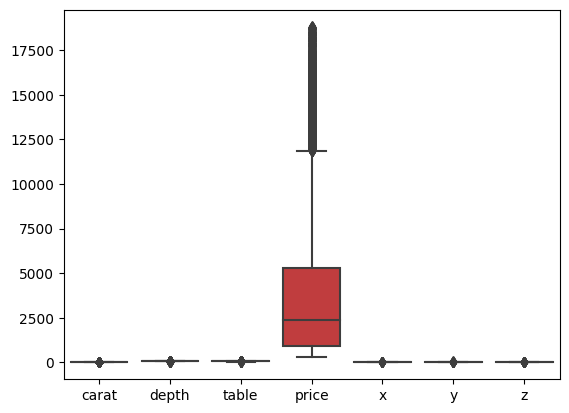

In [ ]:
sns.boxplot(train.drop('Id',axis=1))

<Axes: >

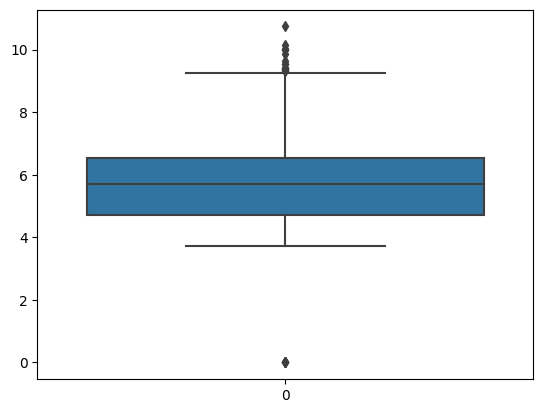

In [ ]:
sns.boxplot(data=train['x'])

In [ ]:
#this boxplot shows the outliers in x column

<Axes: >

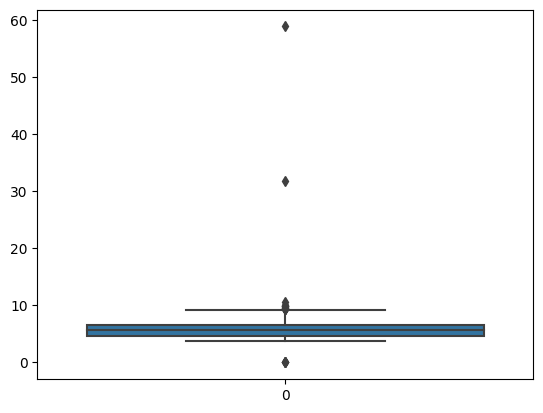

In [ ]:
sns.boxplot(data=train['y'])

In [ ]:
#this plot shows the outliers in y column

<Axes: >

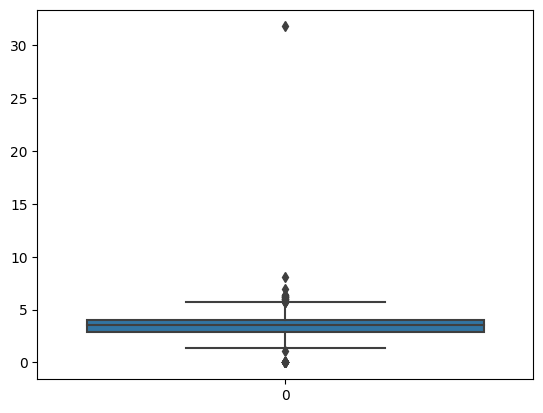

In [ ]:
sns.boxplot(data=train['z'])

In [ ]:
#This plot shows outliers in z column

<Axes: >

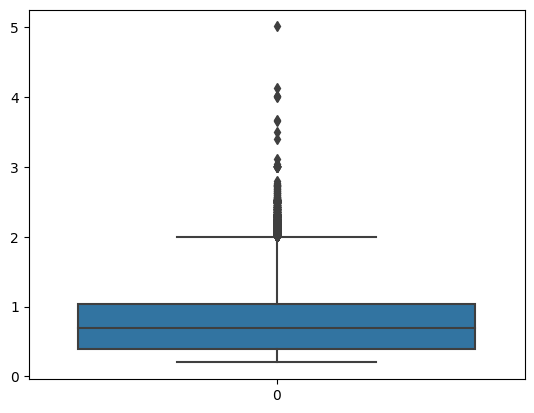

In [ ]:
sns.boxplot(data=train['carat'])

In [ ]:
#this plot shows the outliers in carat column

Text(0.0, 1.0, 'Price with cut, color and clarity columns')

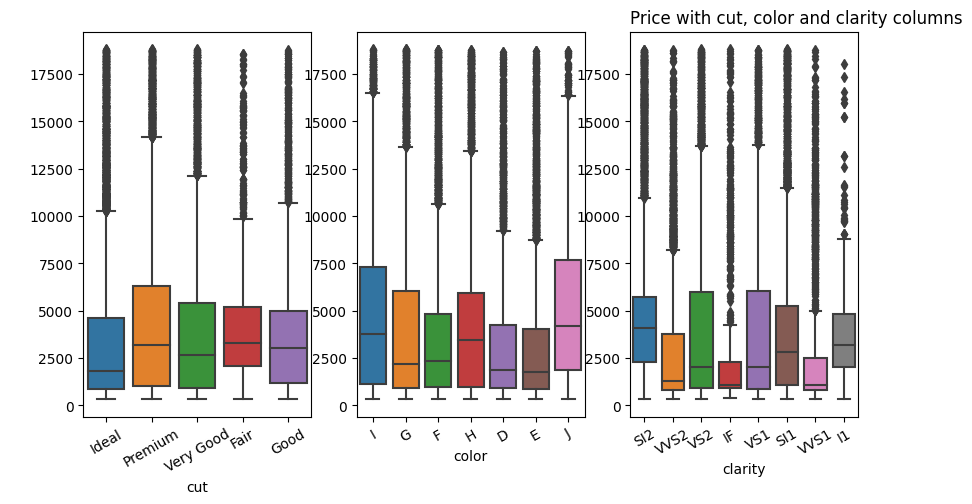

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(x='cut',y='price',data=train,ax=ax[0])
sns.boxplot(x='color',y='price',data=train,ax=ax[1])
sns.boxplot(x='clarity',y='price',data=train,ax=ax[2])
for i in range(3):
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
  ax[i].set_ylabel(' ')
plt.title('Price with cut, color and clarity columns',loc='left')  

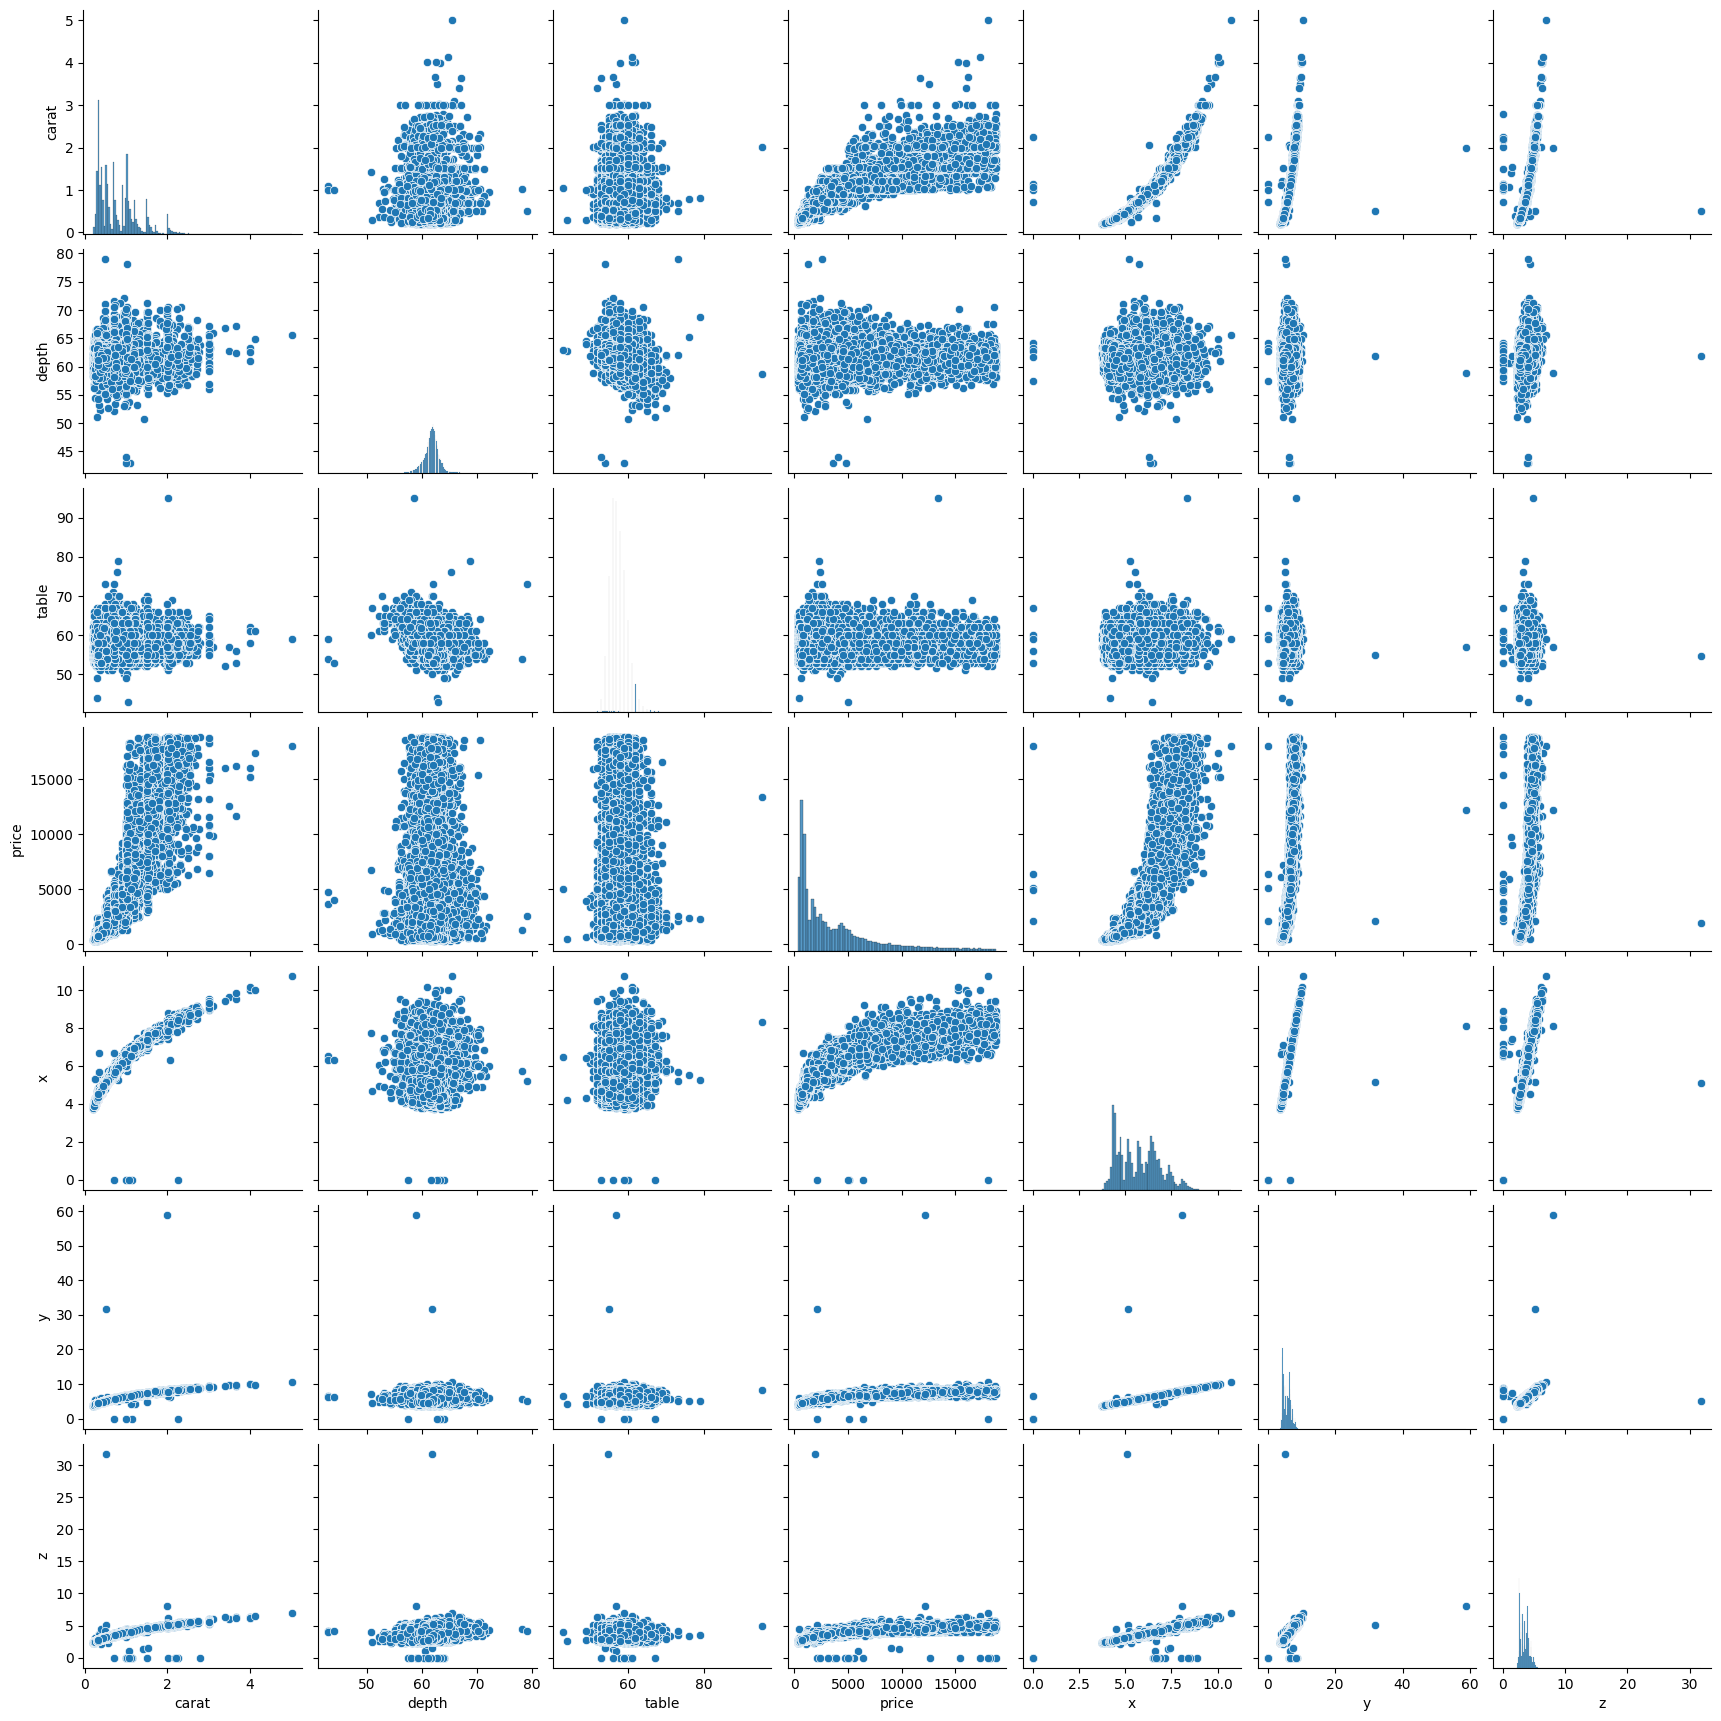

In [ ]:
sns.pairplot(train.drop('Id',axis=1))

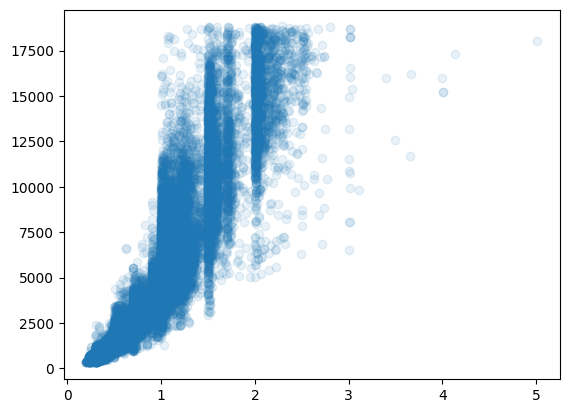

In [ ]:
plt.scatter(x=train['carat'],y=train['price'],alpha=0.1)

In [ ]:
#this scatter plot shows the exponintial relation between carat and price

<ipython-input-20-ddf33c5dbfad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.drop('Id',axis=1).corr(),vmin=-1,vmax=1,annot=True)


Text(0.5, 1.0, 'Correlation between features')

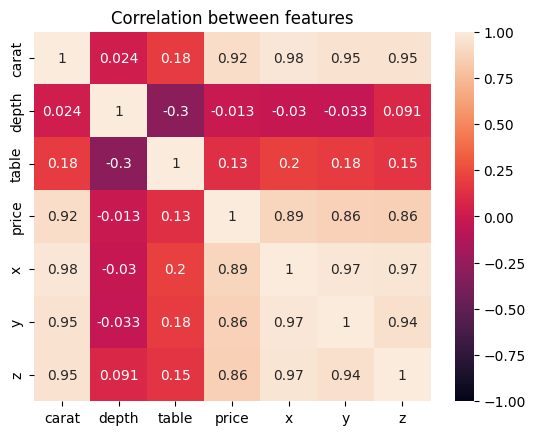

In [ ]:
sns.heatmap(train.drop('Id',axis=1).corr(),vmin=-1,vmax=1,annot=True)
plt.title('Correlation between features')

# Data preprocessing

In [6]:
#remove zero values from x,y,z
train.drop(train[train['x']==0].index,inplace=True)
train.drop(train[train['y']==0].index,inplace=True)
train.drop(train[train['z']==0].index,inplace=True)

In [7]:
#remove outliers
train = train[(train["depth"]<75)&(train["depth"]>45)]
train = train[(train["table"]<80)&(train["table"]>40)]
train = train[(train["x"]<30)]
train = train[(train["y"]<30)]
train = train[(train["z"]<30)]

# Implementation

In [8]:
#get data
diamond_data=train.drop(['Id','price'],axis=1)
diamond_price=train['price'].copy()

**Making Pipeline**

In [12]:
num_attribs=[]
cat_attribs=[]
for name in list(diamond_data):
  if name=='carat':
    continue
  if name =='cut' or name=='color' or name=='clarity':
    cat_attribs.append(name)
  else:
    num_attribs.append(name)
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.add_volume = True
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        np.seterr(invalid='ignore')           
        volume=np.multiply(X[:,2],X[:,3],X[:,4]) #adding the volumn column where volum=x * y * z    
        return np.c_[X, volume]      

num_pipeline=Pipeline(
    [   ('imputer',SimpleImputer(strategy="median")), #to avoid any null values coming from adding the new cloumn[s]
        ('attribs_adder', CombinedAttributesAdder()), #adding the volumn column
        ('std_scaler', StandardScaler())] #scaling data
    )
cat_pipeline=Pipeline(
    [
     ('ordinal_encoder',OrdinalEncoder()), #catigorical data are ordered, so we use ordinal encoder
     ('std_scaler',StandardScaler()) #scaling data
]
    )    
log_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                             ('log_trans',FunctionTransformer(np.log,feature_names_out="one-to-one")),#the output feature names will be equal to the input feature names
                             ('std_scaler', StandardScaler())])

full_pipeline=ColumnTransformer([
    ('log',log_pipeline,['carat']),
    ('num',num_pipeline,num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])
prepared_data=full_pipeline.fit_transform(diamond_data)

In [ ]:
full_pipeline

ColumnTransformer(transformers=[('log',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_trans',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>)),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['carat']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['depth', 'table', 'x', 'y', 'z']),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['cut', 'color', 'clarity'])])

**Select and Train Models**




In [10]:
#Linear regression
from sklearn.pipeline import make_pipeline

linear_regression = make_pipeline(full_pipeline, LinearRegression())
linear_regression.fit(diamond_data,diamond_price)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x', 'y',
                                                   'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

In [ ]:
#Decision tree
decision_tree= make_pipeline(full_pipeline, DecisionTreeRegressor())
decision_tree.fit(diamond_data,diamond_price)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x', 'y',
                                                   'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
#Fandom Forest
random_forest= make_pipeline(full_pipeline, RandomForestRegressor(n_estimators=1000,random_state=42)) #default number of estimators 10
random_forest.fit(diamond_data,diamond_price)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x', 'y',
                                                   'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1000, random_state=42))])

In [ ]:
#Lasso
lasso_reg= make_pipeline(full_pipeline, Lasso(max_iter = 100000))
lasso_reg.fit(diamond_data,diamond_price)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x', 'y',
                                                   'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('lasso', Lasso(max_iter=100000))])

In [ ]:
#XGBRegressor
xgb_reg=make_pipeline(full_pipeline, XGBRegressor(learning_rate=0.1)) #default number of estimators is 100
xgb_reg.fit(diamond_data,diamond_price)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder'...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

# Ensemble learning

In [ ]:
from sklearn.ensemble import VotingRegressor


In [ ]:
voting_grn=VotingRegressor(
estimators=[('randomForest', random_forest),
            ('XGBoost',xgb_reg)])
voting_grn.fit(diamond_data,diamond_price)

VotingRegressor(estimators=[('randomForest',
                             Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('log',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('log_trans',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>)),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['carat']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                Simple...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.1,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]))])

# Fine Tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
pipeline = Pipeline(steps=[
     ('preprocess', full_pipeline),
     ('FandomForest', RandomForestRegressor(n_estimators=1000,max_features=4,max_depth= 20))
])

parameter_grid = {'FandomForest__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)],
        'FandomForest__max_features': [int(x) for x in np.linspace(start=4, stop=10, num=1)],
        'FandomForest__max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]}

random_search_forest = RandomizedSearchCV(pipeline,
                           param_distributions =parameter_grid,
                           cv=10,                          
                            scoring='neg_root_mean_squared_error')
random_search_forest.fit(diamond_data,diamond_price)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('log',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('log_trans',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>)),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['carat']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy...
                                              RandomForestRegressor(max_depth=20,
                                                                    max_features=4,
                                                                    n_estimators=1000))]),
                   param_distributions={'FandomForest__max_depth': [10, 20, 30,
                                                                    40, 50, 60,
                                                                    70, 80, 90,
                                                                    100, 110],
                                        'FandomForest__max_features': [4],
                                        'FandomForest__n_estimators': [200, 208,
                                                                       216, 224,
                                                                       232, 240,
                                                                       248, 256,
                                                                       264, 272,
                                                                       280, 288,
                                                                       296, 305,
                                                                       313, 321,
                                                                       329, 337,
                                                                       345, 353,
                                                                       361, 369,
                                                                       377, 385,
                                                                       393, 402,
                                                                       410, 418,
                                                                       426, 434, ...]},
                   scoring='neg_root_mean_squared_error')

In [ ]:
random_search_forest.best_estimator_ 

In [ ]:
print('Best score: {}'.format(random_search_forest.best_score_))
print('Best parameters: {}'.format(random_search_forest.best_params_))

Best score: -573.2887905755308
Best parameters: {'FandomForest__n_estimators': 684, 'FandomForest__max_features': 4, 'FandomForest__max_depth': 40}


# Evaluation using cross validation




In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
def cross_validation(model,input_data=diamond_data,lable=diamond_price,scoring_='neg_root_mean_squared_error',cv_=10):
  return -cross_val_score(model, input_data, lable, 
                          scoring=scoring_,cv=cv_)


In [ ]:
models_rmse={'Linear Regression':cross_validation(linear_regression),
             'Decision Tree':cross_validation(decision_tree),
             'Random Forest':cross_validation(random_forest),             
             'Lasso':cross_validation(lasso_reg),
             'XGBoost':cross_validation(xgb_reg,cv_=14),
             'Voting Regressor': cross_validation(voting_grn)}
ml = pd.DataFrame(columns=['model name','mean','std'])
keys=list(models_rmse.keys())
for i in range(len(keys)):
    ml.loc[i, 'model name'] = keys[i]
    ml.loc[i, 'mean'] = models_rmse[keys[i]].mean()
    ml.loc[i,'std']=models_rmse[keys[i]].std()
ml    

,model name,mean,std
0,Linear Regression,1307.634134,22.250063
1,Decision Tree,750.629758,26.780535
2,Random Forest,553.406443,22.423924
3,Lasso,1308.112555,21.202559
4,XGBoost,533.700094,19.640827
5,Voting Regressor,529.086949,20.764956


# Save result

In [ ]:
Id=test['Id']

In [ ]:
pred=voting_grn.predict(test.drop('Id',axis=1))
voting_grn_data={'Id': Id, 'price':pred }

sub = pd.DataFrame(data=voting_grn_data)
sub.to_csv('./sub.csv',index=False)
pred